# **Project Name**    - Bank Marketing Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Jayesh Prakash Dahiwale


# **Project Summary -**

#**Bank Marketing Effectiveness**

## The Data is related to direct marketing campaigns(phone calls) of a Portugese banking institution.The marketing campaigns were based on phone calls. Often, more than one call to the same client, in order to access if the product(bank term deposit) would be 'YES' or not 'NO' subscribed. The classification goal is to predict if the client will subscribe to the term deposit (variable y).

##**Term Deposit**

*   A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.  

*   Term deposits are usually short-term deposits with maturities ranging from one month to a few years.





# **GitHub Link -** 


https://github.com/Jayeshdahiwale/Capstone-Project-3-Bank-Marketing-effectiveness-Prediction

# **Problem Statement**


##**AIM**

*   *Using the given dataset and developing a ML model out of it with **TARGET:Deposit (YES/NO)** For Classifying a new customer based on given features and also **Determining the most relevent features** of 
classification*




# **Variable Explaination**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

1. Age - **(numeric)** Age of the customer


2. Job - **(Categorical)** Represents the diferent types of Jobs. eg. {'Admin','BlueCollar','Entrepreneur','Housemaid','Management','Retired'} etc.


3. Marital - **(Categorical)** {Divorced, Married, Single,Unknown.} Note: Divorced meaning Divorced or Widowed.


4. Education - **(Categorical)** '' {'Basic4y','Basic6y','Basic9y','highschool','illiterate'} etc.


5. Dafault - **(Cateogircal)** Has credit in default {'YES','NO', 'Unknown'}


6. Housing - **(Categorical)** has housing loan ? {'YES' , 'NO' , 'Unknown'}

7. loan - **(Categorical)** has personal loan ? {'YES'  , 'NO'  , 'Unknown'}


8. Contact - **(Categorical)** contact communication types {'Cellular', 'Telephone'}


9. Month - **Categorical** Last contact month of the year {'Jan' , 'Feb' , 'Mar'..........,'Dec'}


10. day_of_week - **Categorical** Last contact day of week. {'Mon','Tue','Wed','Thu','Fri','Sat'} etc.


11. Duration - **(numeric)** Last contact duration in seconds. **Important note:**  This feature highly attributed to the target value Y. i.e. if the call duration is zero the output is "NO". Also after the end of the call y is obviously known. Thus this feaute should only be included for benchmark purposes and should be discarded if the intention is to build realstic predictive model.

12. Campaign - **(numeric)** No of contacts performed during this campaign and for this client


13. pDays - **(numeric)** No of days that passed by after the client was last contacted. **999** means cliendt was not contacted.


14. previous - **(numeric)** number of contacts performed before this campaign for this client


15. pOutcome - **(categorical)** Outcome of the previous campaingn. {'Success','Failure','Non-existence'}


16. y-target Variable - **(Binary)** has the client subscriber to a term deposit. {'Yes' , 'NO'}






# **ABOUT NOTEBOOK**

### **NOTEBOOK SECTIONS :**

##### **1) DATA LOADING AND DATA INSIGHTS(SHAPE , COLUMNS ,INFORMATION )**


**2) DATA CLEANING (HANDLING NULL ,DROPPING IRRELEVANT FEATURES)**


**3) DATA VISUALISATION & PLOTTING CORRELATION HEATMAP**


**4) FEATURE ENGINEERING (HANDING OUTLIERS)**


**5) CATEGORICAL VARIABLES ENCODING**


**6) SPLITTING DATA INTO TRAINING AND TESTING SETS**


**7) SCALING DATA USING STANDARDSCALER**


**8) MODEL SELECTION BASED ON CROSS VAL SCORES (XGB CLASSIFIER VS RANDOM FOREST)**


**9) MODEL MODEL OPTIMAL PARAMETER SELECTION USING GRIDCV**


**10)MODEL BUILDING USING ABOVE RESULTS**


**11) FINDING MOST IMPORTANT FEATURES OF CLASSIFICATION OF DEPOSIT**


**12) PLOTTING CONFUSION MATRIX**

# ***Let's Begin !***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score

In [ ]:
# mount the google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set up the working dir path and reading the csv file
working_dir = '/content/drive/MyDrive/MachineLearningAlmabetterJourney/Projects/CapstoneProject3/'
df = pd.read_csv(working_dir + 'bank-full.csv',sep = ';',engine = 'python')


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


There are total **45211 rows** and 17 columns

# **EDA (*Exploratory Data Analyisis*)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
count = pd.DataFrame(df.isnull().sum(),columns=['count'])
count.index.name = 'Features'
count

,count
Features,
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
cat_features = df.select_dtypes('object').columns
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# get all the unique values in every categorical calulmns
print('*All categorical features and their distinct value use*\n')
for c in cat_features:
  print(c,'--->',df[c].unique())
  print()


*All categorical features and their distinct value use*

job ---> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital ---> ['married' 'single' 'divorced']

education ---> ['tertiary' 'secondary' 'unknown' 'primary']

default ---> ['no' 'yes']

housing ---> ['yes' 'no']

loan ---> ['no' 'yes']

contact ---> ['unknown' 'cellular' 'telephone']

month ---> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome ---> ['unknown' 'failure' 'other' 'success']

y ---> ['no' 'yes']



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
# checking for null
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

***Data Visualization***

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


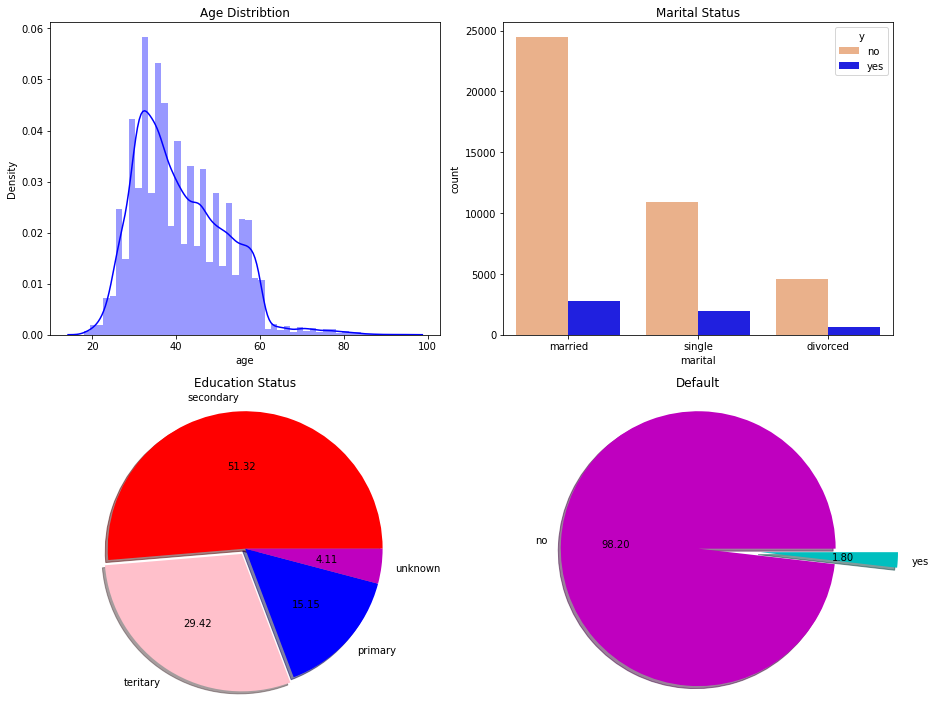

In [ ]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.distplot(df['age'],color='b')
plt.title('Age Distribtion')

plt.subplot(2,2,2)
sns.countplot(df['marital'],hue=df['y'],palette=["#FAAE7B",'#0000FF'])
plt.title('Marital Status')

plt.subplot(2,2,3)
plt.pie(df['education'].value_counts(),labels=['secondary','teritary','primary','unknown'],colors = ['r','pink','b','m'],
        autopct = '%.2f',explode = [0,0.05,0,0],shadow = 0.5,radius=1.1)
plt.title('Education Status')
plt.tight_layout()

plt.subplot(2,2,4)
plt.pie(df['default'].value_counts(),labels = df['default'].unique(),colors = ['m','c'],autopct='%.2f',explode = [0,0.5],shadow=0.5,radius = 1.1)
plt.title('Default')
plt.tight_layout()

We can see that the distibution of age is following the positively skewd distribution. Suggesting that the age column may have some ouliers.

From the marital status count bar plot , we can conclude that v**ery less percentage** of **married couple** opt for Term Deposit. But thosw who are **single** has higher percentage of opting for tem deposit.

For education status , one can infer that most of the customers have completed with their **Secondary education.**

Very less no of customers have credit in default.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Job Status'}, xlabel='job', ylabel='count'>

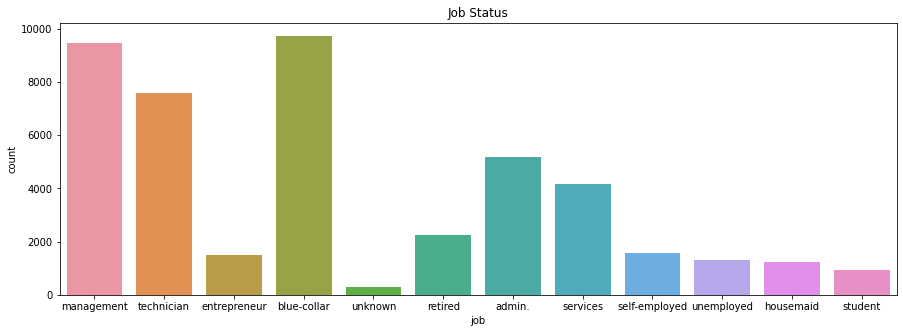

In [ ]:
plt.figure(figsize = (15,5))
plt.title('Job Status')
sns.countplot(df['job'])

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

We can see that most of the employee are involved in **blue collar jobs** and very less are **students**. Which is obvious as stundents don't usually have source of income

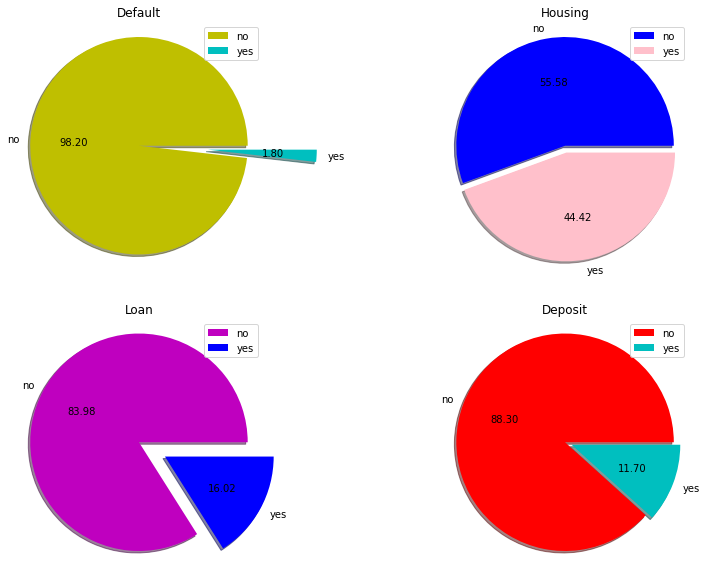

In [ ]:
plt.figure(figsize = (14 ,10))
plt.subplot(2,2,1)
plt.pie(df['default'].value_counts() ,colors =['y' ,'c'] ,explode =[0 ,0.7] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6 
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Default')
plt.legend()

plt.subplot(2,2,2)
plt.pie(df['housing'].value_counts() ,colors =['b' ,'pink'] ,explode =[0 ,0.07] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6 
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Housing')
plt.legend()

plt.subplot(2,2,3)
plt.pie(df['loan'].value_counts() ,colors =['m' ,'b'] ,explode =[0 ,0.3] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Loan')
plt.legend()

plt.subplot(2,2,4)
plt.pie(df['y'].value_counts() ,colors =['r' ,'c'] ,explode =[0 ,0.07] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Deposit')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Education Distribution with Deposit')

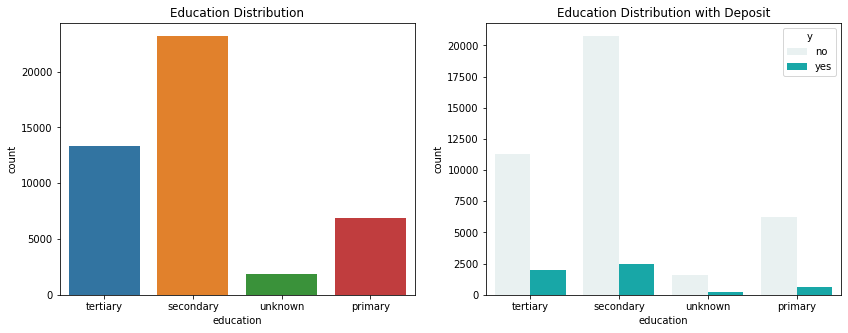

In [ ]:
plt.figure(figsize =(14 ,5))
plt.subplot(1 ,2,1)
plt.title('Education Distribution')
sns.countplot(df['education'])
plt.subplot(1 ,2,2)
sns.countplot(df['education'] ,hue =df['y'] ,color = 'c')
plt.title('Education Distribution with Deposit')

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Poutcome Distribution with Deposit'}, xlabel='poutcome', ylabel='count'>

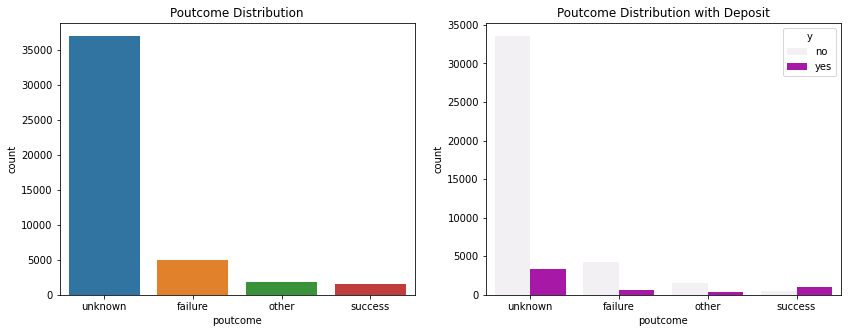

In [ ]:
plt.figure(figsize =(14 ,5))
plt.subplot(1,2,1)
plt.title('Poutcome Distribution')
sns.countplot(df['poutcome'])
plt.subplot(1,2,2)
plt.title('Poutcome Distribution with Deposit')
sns.countplot(df['poutcome'] ,hue =df['y'] ,color ='m' )

In [ ]:
pd.DataFrame(df.groupby(['poutcome','y']).y.count())

y
poutcome y         
failure  no    4283
         yes    618
other    no    1533
         yes    307
success  no     533
         yes    978
unknown  no   33573
         yes   3386

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

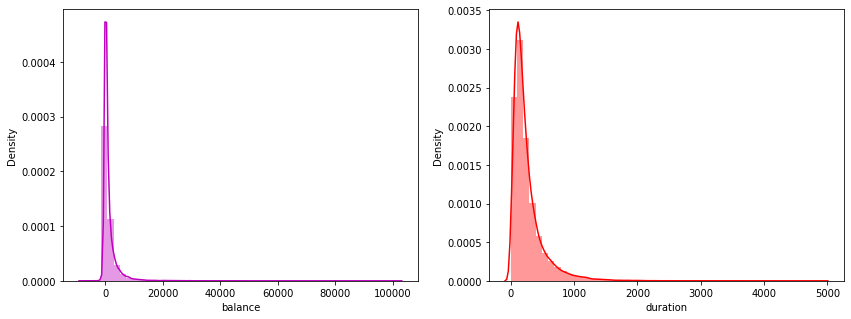

In [ ]:
plt.figure(figsize = (14 ,5))
plt.subplot(1,2,1)
sns.distplot(df['balance'],color ='m')
plt.subplot(1,2,2)
sns.distplot(df['duration'] ,color ='r')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Campaign Distribution with Deposit')

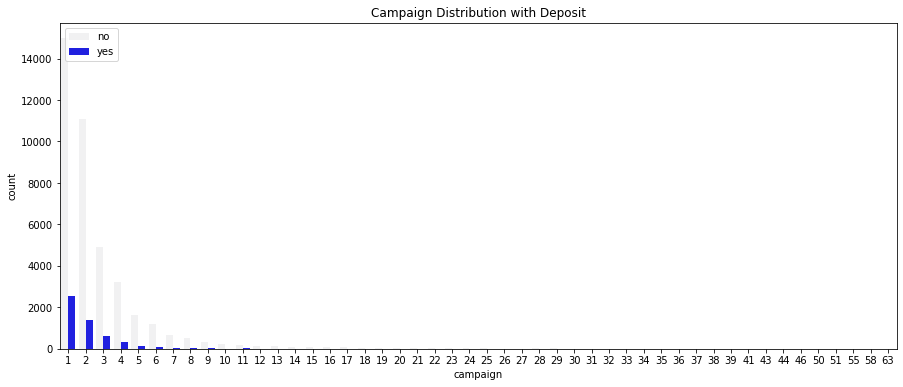

In [ ]:
plt.figure(figsize =(15 , 6))
sns.countplot(df['campaign'], hue=df['y'] ,color ='b')
plt.legend()
plt.title('Campaign Distribution with Deposit')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


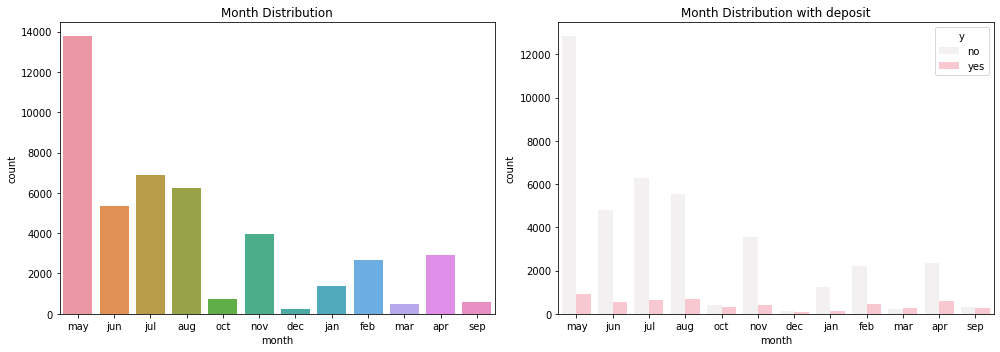

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(df['month'])
plt.title('Month Distribution')

plt.subplot(1,2,2)
sns.countplot(df['month'],hue = df['y'],color= 'pink')
plt.title('Month Distribution with deposit')
plt.tight_layout()

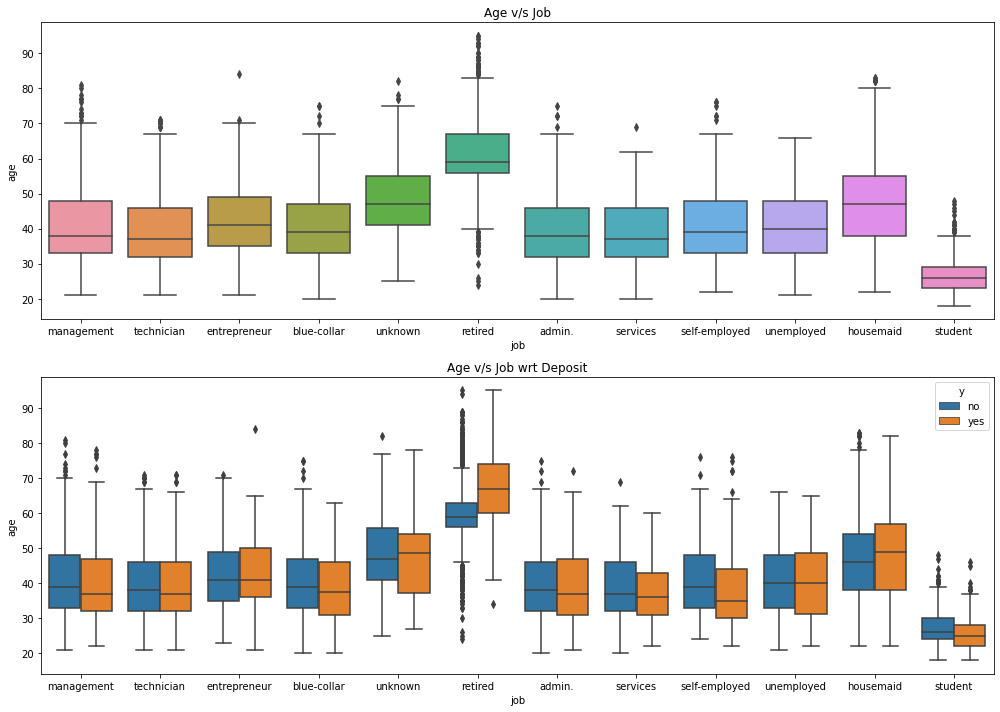

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.boxplot(x= df['job'],y=df['age'])
plt.title('Age v/s Job')

plt.subplot(2,1,2)
sns.boxplot(x= df['job'],y=df['age'],hue=df['y'])
plt.title('Age v/s Job wrt Deposit')

plt.tight_layout()

<AxesSubplot:>

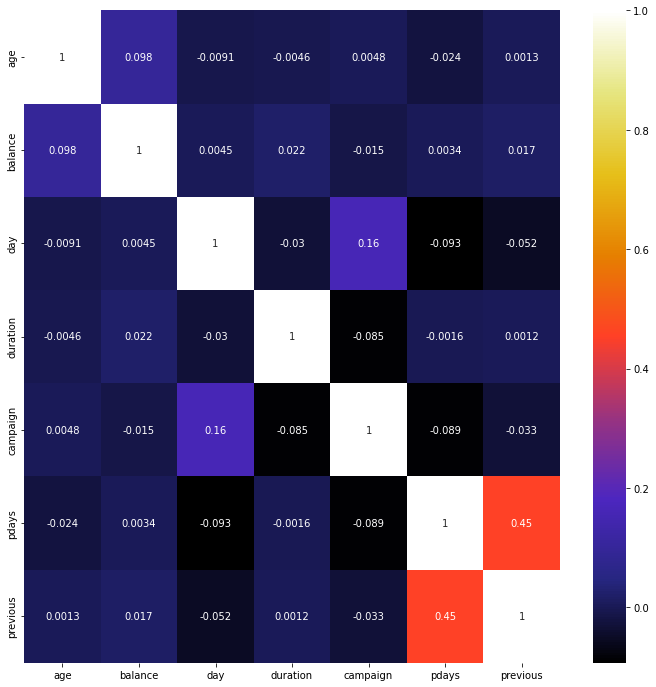

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='CMRmap')

##***OUTCOME OF EDA AND DATA VISUALIZATION***

###**After EDA we found**


*   *No missing values*
*   default feature donot play any significant important role
*   We found some outliers in the feature (age,balance,duration,pdays and previous)







#***FEATURE ENGINEERING***


In [ ]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###***REMOVING OUTLIERS***

In [ ]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

Most of its values are no. Need to drop default as no imp role.

In [ ]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

similarly pdays also has no significance . most of its values are -1

In [ ]:
#dropping the default and pdays column
df2.drop(columns = ['default','pdays'],axis =1,inplace=True)

In [ ]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [ ]:
df2.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [ ]:
df2['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
def calculate_outlier(df,column): ## function for calculating outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    print(IQR)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
    return lower, upper, percent_outliers

In [ ]:
calculate_outlier(df2,'age')

15.0


(10.5, 70.5, 1.08)

We found out that the total percentage outliers are 1.08.

So decidded to replace the lower outliers with the 10.5 

And replace the upper outliers with the value equal to 70.5

In [ ]:
df2.loc[df2['age']>70.5,'age']= 70.5
df2.loc[df2['age']<10.5,'age'] = 10.5

In [ ]:
df2.groupby(['y','balance'],sort = True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

Need not to be removed as balance gets higher , clients show interest on deposit

In [ ]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

Should not be removed as with increase in duration the client shows more interest in deposit

In [ ]:
df2.groupby(['y' ,'campaign'],sort = True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [ ]:
len(df2[(df2['campaign']==1) & (df2['y']=='yes')])

2561

In [ ]:
# removeing campaign outliers
calculate_outlier(df2,'campaign')

2.0


(-2.0, 6.0, 6.78)

In [ ]:
 #removing outliers
df3 = df2[df2['campaign'] <32]
df3.groupby(['y' ,'campaign'] ,sort = True)['campaign'].count()


y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             16
     12             

In [ ]:
df3.groupby(['y' ,'previous'] ,sort= True)['previous'].count()

y    previous
no   0           33524
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [ ]:
#removing outliers 
df4 = df3[df3['previous'] <31]

## ***Categorical Feature Encoding***

In [ ]:
df4.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'y'],
      dtype='object')

In [ ]:
cat_cols = ['job', 'marital', 'education' ,'contact', 'month','poutcome']

for col in cat_cols:
  df4 = pd.concat([df4.drop(col,axis=1),pd.get_dummies(df4[col],prefix=col,drop_first=True,dummy_na=False)],axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
df4.head()

,age,balance,housing,loan,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143,yes,no,5,261,1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44.0,29,yes,no,5,151,1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33.0,2,yes,yes,5,76,1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47.0,1506,yes,no,5,92,1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33.0,1,no,no,5,198,1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#BOOLEAN TYPE FEATURES
boolean_cols = ['housing','loan','y']
for col in boolean_cols:
  df4[col + '_new'] = df4[col].apply(lambda x: 1 if x=='yes' else 0)
  df4.drop(col,axis=1,inplace= True)

### ***Final Dataset***

In [ ]:

df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,58.0,2143,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,44.0,29,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,33.0,2,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0
3,47.0,1506,5,92,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
4,33.0,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
df4.y_new

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_new, Length: 45152, dtype: int64

### **DATASET SPLITTING**

Splitting the Dataset into Training And Testing Sets

In [ ]:
x = df4.iloc[:,:-1].values
y = df4.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(len(x_train),len(x_test))

36121 9031


### ***SCALING THE DATA(STANDARDIZATION)***

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## ***MODEL SELECTION***

**MODEL SELECTION BASED ON CROSS VAL SCORES**

### ***RandomForestClassifier Scores***

In [ ]:
# First applying the ensemble technique... Randomforest model
rf_model_scores = cross_val_score(estimator = RandomForestClassifier(),X= x_train,y=y_train,cv= 5)
print(rf_model_scores)
print(rf_model_scores.mean())


[0.90643599 0.90268549 0.90199336 0.90531561 0.90420819]
0.9041277287932956


### ***XGBoost Classifier Scores***

In [ ]:
xg_model_scores = cross_val_score(estimator = XGBClassifier(),X = x_train,y=y_train,cv = 5)
print(xg_model_scores)
print(xg_model_scores.mean())

[0.90560554 0.90033223 0.90268549 0.90739203 0.90753045]
0.9047091471335456


### ***Model optimal parameter using GridSearchCV***

In [ ]:
model_params = {'RandomForestClassifier':
                {'model':RandomForestClassifier(),'params':{'n_estimators':[10,50,100,130],'criterion':['gini','entropy'],'max_depth':[2,3],'max_features':['auto','log2']}},
                'XGBClassifier':{'model':XGBClassifier(),'params':{'n_estimators':[10,50,100,200],'learning_rate':[0.5,0.1,0.01,0.001],'max_depth':[3,5,10,20]}}
                }

In [ ]:

# from sklearn.model_selection import GridSearchCV
# score = []

# for model,params in model_params.items():
#   model_sel = GridSearchCV(estimator = params['model'], param_grid = params['params'])
#   model_sel.fit(x_train,y_train)
#   score.append([{'Model':params['model'],'Model Score':model_sel.best_score_,'Best Params':model_sel.best_params_}])


In [ ]:
#score

#Commented above code because it was taking more than 1 hour to execute.



```
# This is formatted as code..Below is the result of above query
[[{'Model': RandomForestClassifier(),
   'Model Score': 0.8845270091620779,
   'Best Params': {'criterion': 'gini',
    'max_depth': 3,
    'max_features': 'auto',
    'n_estimators': 100}}],
 [{'Model': XGBClassifier(),
   'Model Score': 0.9041554411094124,
   'Best Params': {'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 100}}]]

```



# **MODEL BUILDING**

In [ ]:
XGBmodel = XGBClassifier(n_estimators=100,max_depth=10,learning_rate = 0.1,objective ='binary:logistic')
XGBmodel.fit(x_train,y_train)
print('XGModel score is :')
XGBmodel.score(x_test,y_test)

XGModel score is :


0.90920163879969

## ***Extracting importnant feature of classification***

In [ ]:
cols = ['feature_name','score']
values = sorted(zip(df4.columns[:-1],XGBmodel.feature_importances_),key = lambda x: x[1]*(-1))
feature_imp = pd.DataFrame(data = values,columns = cols)
feature_imp

,feature_name,score
0,poutcome_success,0.208168
1,contact_unknown,0.088568
2,month_mar,0.050951
3,month_oct,0.044368
4,duration,0.041616
5,month_jun,0.034124
6,month_jan,0.031845
7,month_jul,0.030888
8,month_sep,0.030875
9,month_aug,0.029980


Text(0.5, 0, 'Features')

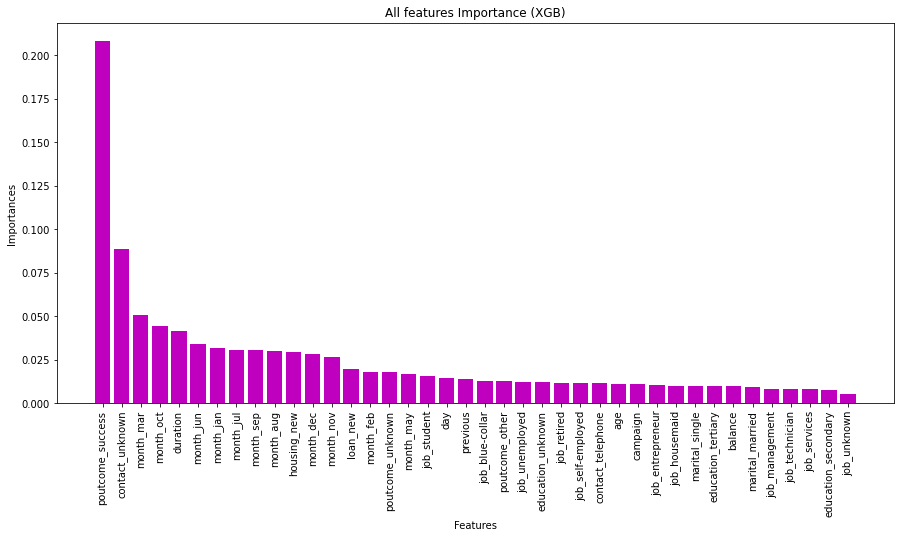

In [ ]:
plt.figure(figsize =(15 ,7))
x_pos = np.arange(0 ,len(feature_imp))
plt.bar(x_pos ,feature_imp['score'] ,color ='m')
plt.xticks(x_pos , feature_imp['feature_name'] ,rotation = 90)
plt.title('All features Importance (XGB)')
plt.ylabel('Importances')
plt.xlabel('Features')

# **CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,XGBmodel.predict(x_test))
score = accuracy_score(y_test,XGBmodel.predict(x_test))
print(cm)
print("accuracy_score " + str(score))

[[7677  265]
 [ 555  534]]
accuracy_score 0.90920163879969


Text(33.0, 0.5, 'Actual Label')

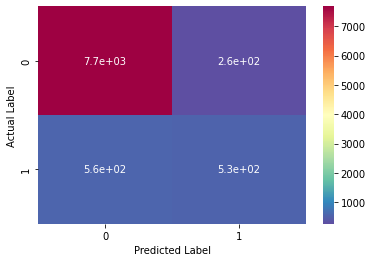

In [ ]:
sns.heatmap(cm,annot= True,cmap = 'Spectral_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,XGBmodel.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7942
           1       0.67      0.49      0.57      1089

    accuracy                           0.91      9031
   macro avg       0.80      0.73      0.76      9031
weighted avg       0.90      0.91      0.90      9031



In [ ]:
# roc_auc_score
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test,XGBmodel.predict(x_test))
print(roc_score)

0.7284956083117756


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***